### Bike demand prediction
Build a model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [28]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [18]:
# checking the shape of the current data
day.shape

(730, 16)

In [19]:
# checking the columns and their datatypes along with null values
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [20]:
# checking the statistical descriptive metrices
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [21]:
#checking the count of values for season column
day['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [22]:
# For seasons, it is not appropriate to have numerical values. Converting them into string
day['season'] = day['season'].map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
day['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [23]:
#checking the count of values for weathersit column
day['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [ ]:
'''
Need to convert weathersit coluns into string values.
Here are the actual meaning of each numerical value
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
Converting it to simple one word string
        1:Clear weather,
        2:Mist  weather,
        3:Light  weather
        4:Heavy  weather
Added weather as appended string because later, it may be used as dummy variable. 
'''
day['weathersit'] = day['weathersit'].map({1: "Clear weather", 2: "Mist weather", 3: "Light weather", 4: "Heavy weather"})
day['weathersit'].value_counts()

weathersit
Clear weather    463
Mist weather     246
Light weather     21
Name: count, dtype: int64

In [25]:
# checking yr column
day['yr'].value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [26]:
#converting yr column into 2018 and 2019 respectively as per data dictionary
day['yr'] = day['yr'].map({0:'2018',1:'2019'})
day['yr'].value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

In [27]:
#checking dteday column
day['dteday'].value_counts()

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64

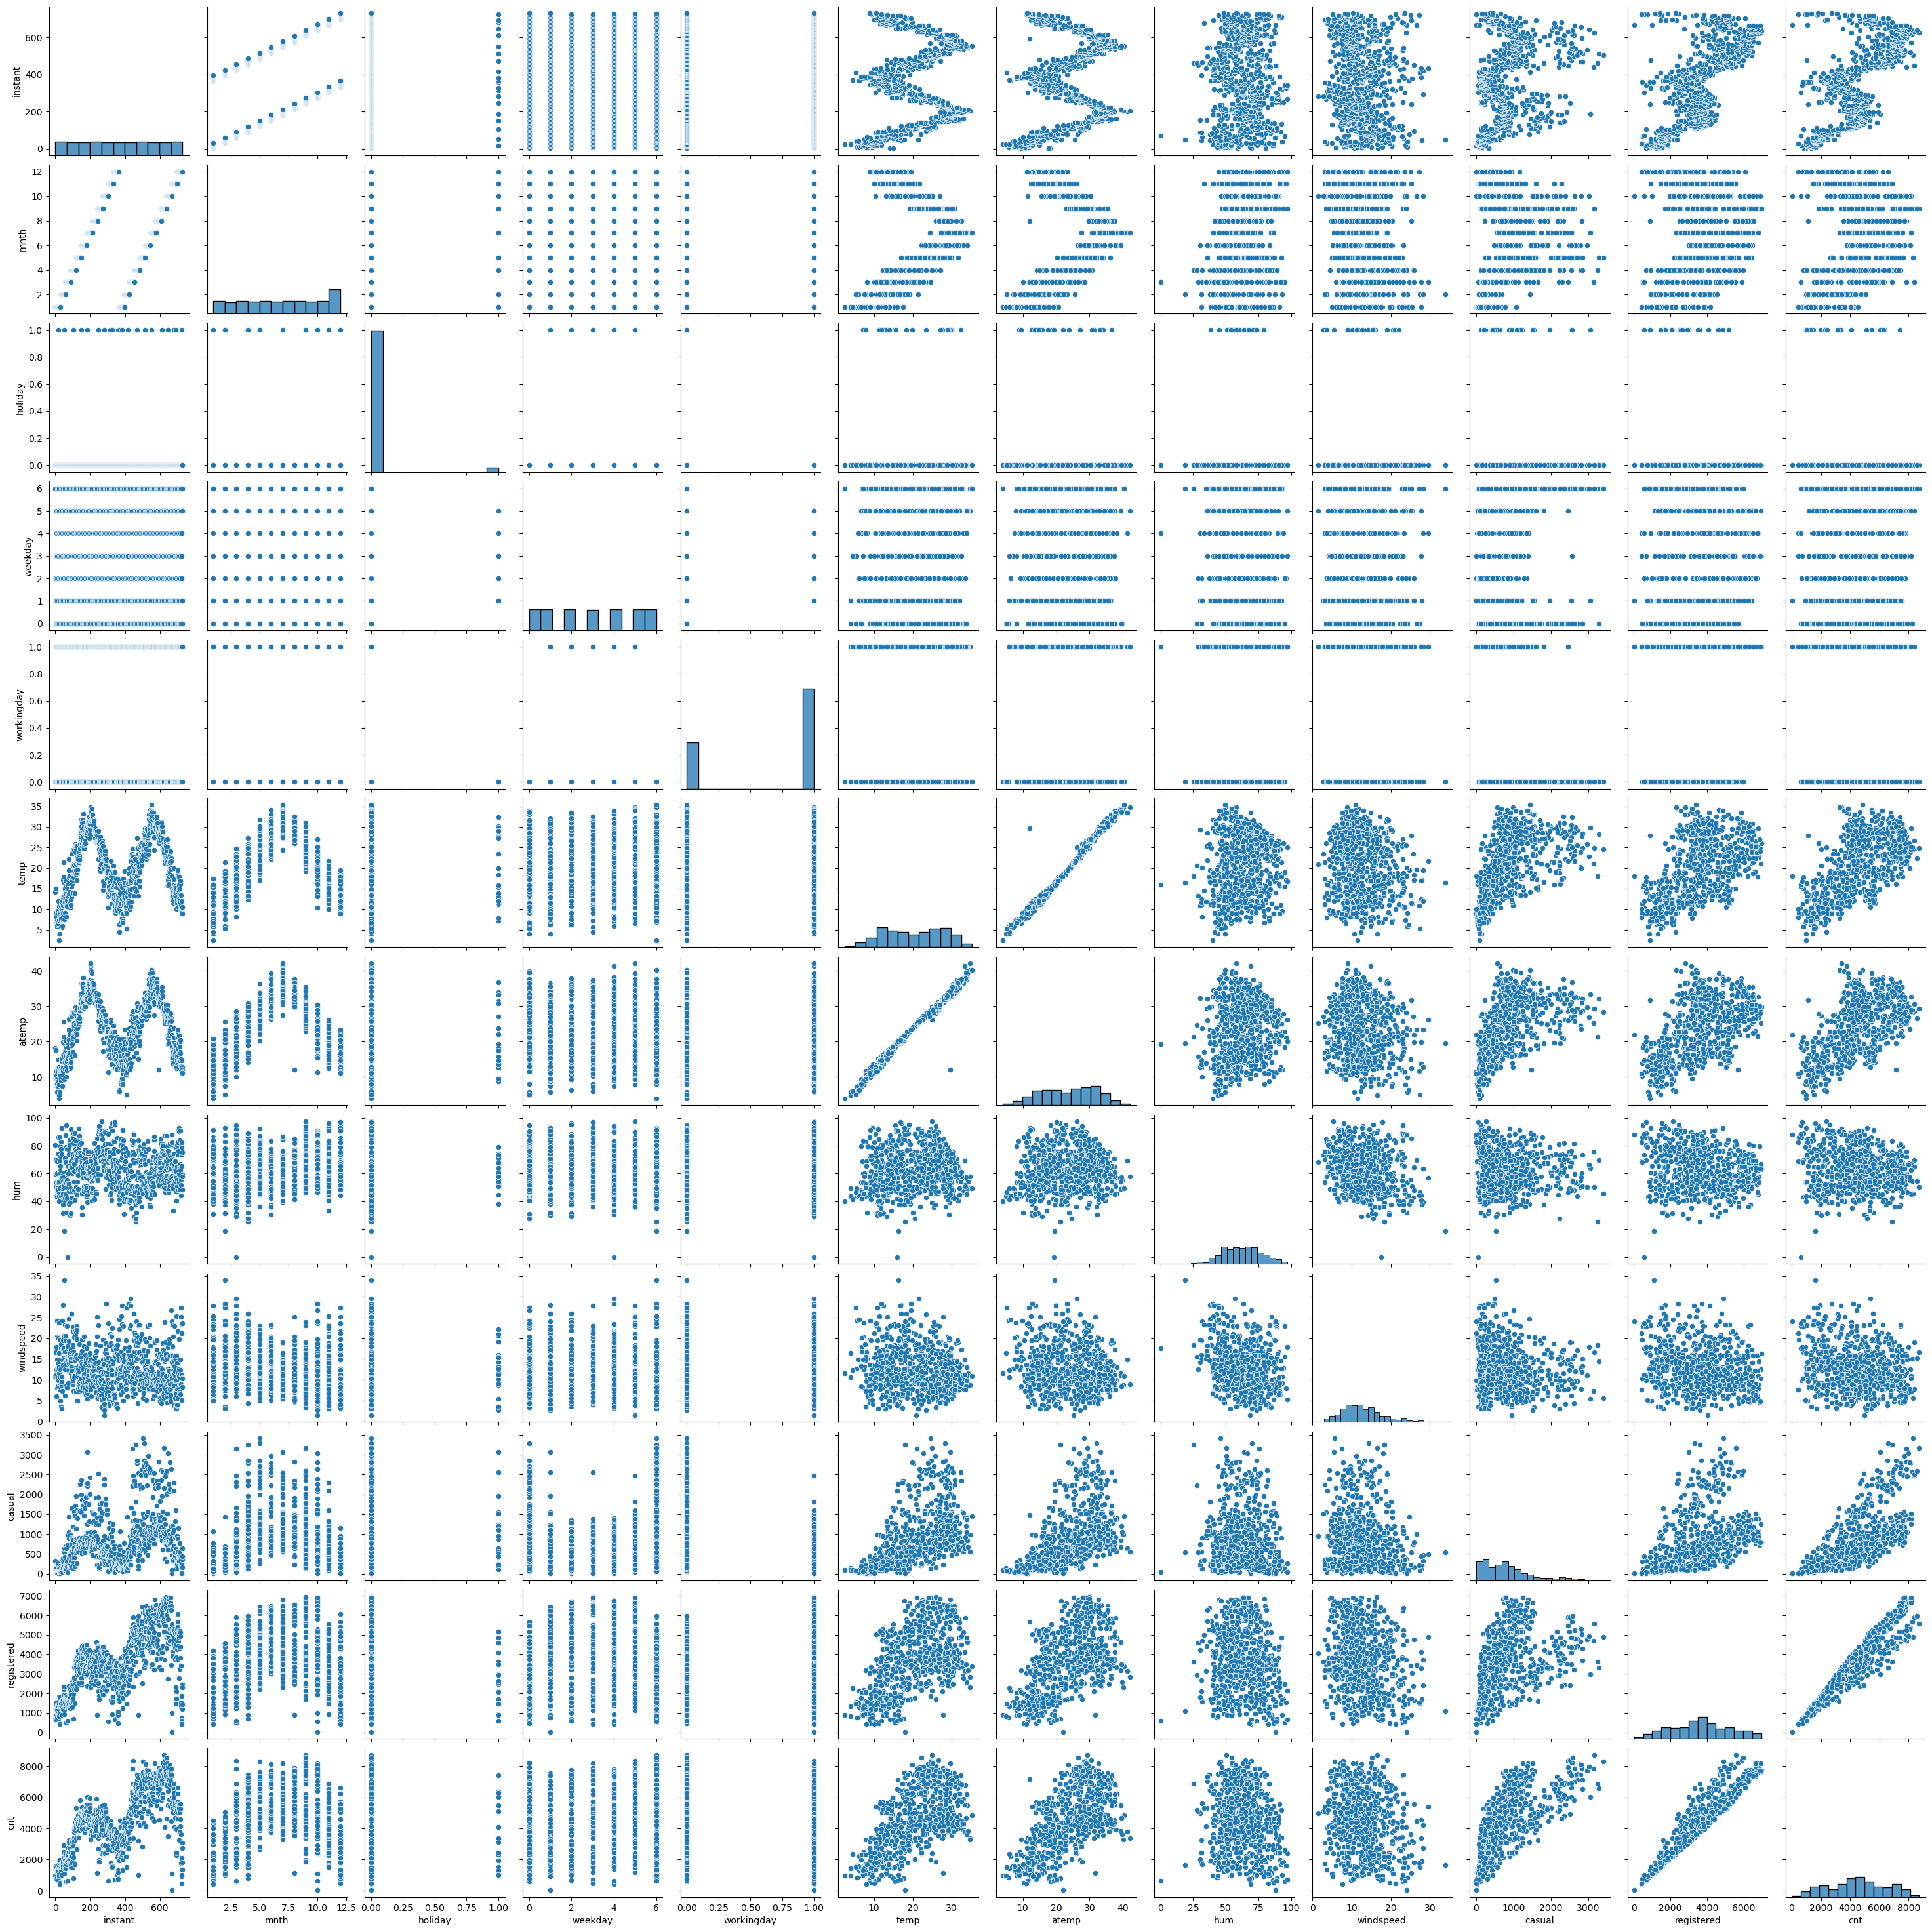

In [30]:
sns.pairplot(day)
plt.show()

<Axes: xlabel='yr', ylabel='cnt'>

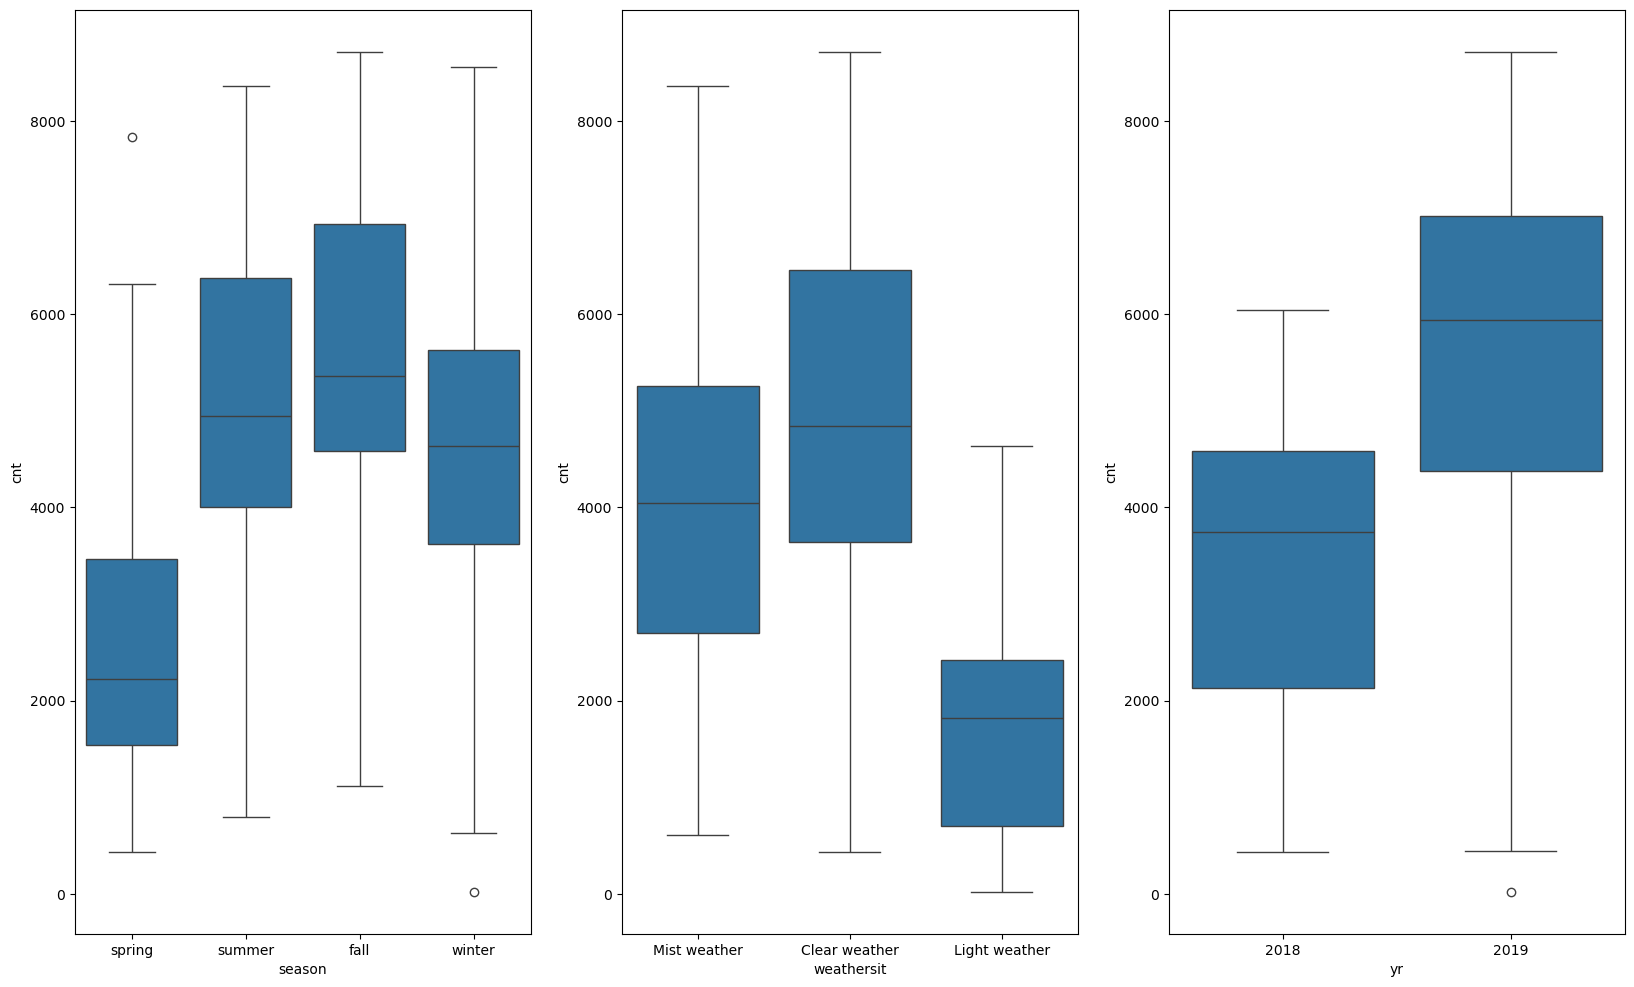

In [32]:
# visualizing the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x='season', y='cnt', data=day)
plt.subplot(1,3,2)
sns.boxplot(x='weathersit', y='cnt', data=day)
plt.subplot(1,3,3)
sns.boxplot(x='yr', y='cnt', data=day)


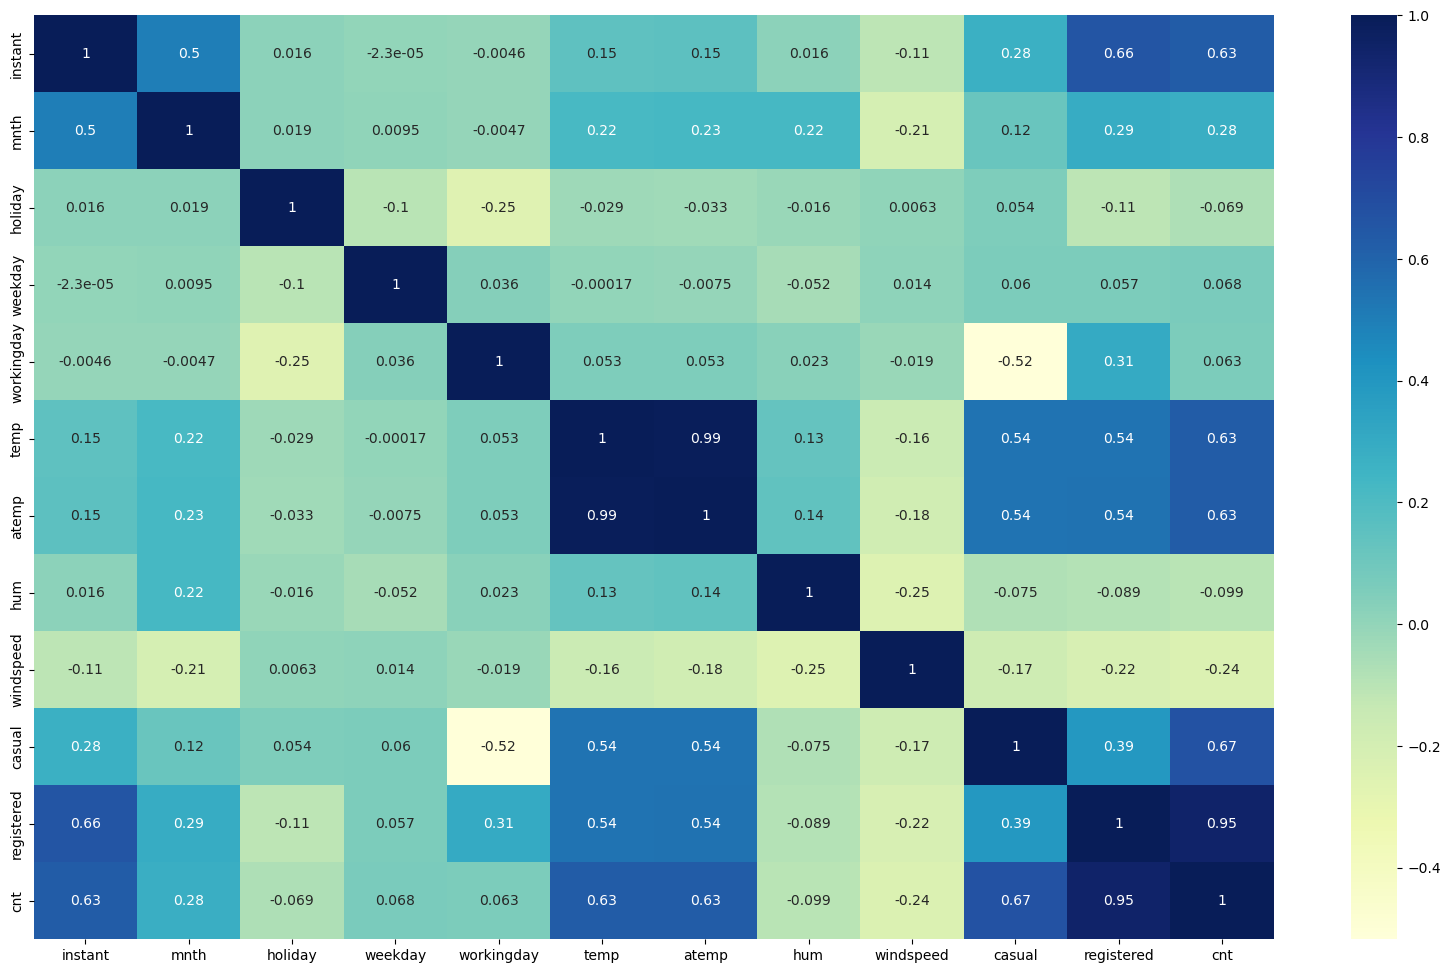

In [35]:
# checking the correlation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(day.corr(numeric_only=True),annot=True, cmap='YlGnBu')
plt.show()

In [36]:
# Creating dummy vars for season
# dropping a redundant dummy var
season = pd.get_dummies(day['season'], dtype=int, drop_first=True)
season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [37]:
day = pd.concat([day, season], axis=1)
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,1,01-01-2018,spring,2018,1,0,6,0,Mist weather,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,spring,2018,1,0,0,0,Mist weather,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,spring,2018,1,0,1,1,Clear weather,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,spring,2018,1,0,2,1,Clear weather,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,spring,2018,1,0,3,1,Clear weather,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [ ]:
day = day.drop('season',axis=1)
day.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,1,01-01-2018,2018,1,0,6,0,Mist weather,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,2018,1,0,0,0,Mist weather,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,2018,1,0,1,1,Clear weather,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,2018,1,0,2,1,Clear weather,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,2018,1,0,3,1,Clear weather,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [41]:
# Creating dummy vars for weathersit
# dropping a redundant dummy var
weathersit = pd.get_dummies(day['weathersit'], dtype=int, drop_first=True)
day = pd.concat([day, weathersit], axis=1)
day = day.drop('weathersit',axis=1)
day.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Light weather,Mist weather
0,1,01-01-2018,2018,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,02-01-2018,2018,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,03-01-2018,2018,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,4,04-01-2018,2018,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,5,05-01-2018,2018,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0
